# Medicina Inteligente: atravesando fronteras con Inteligencia Artificial

3 PREGUNTAS PARA LOS ALUMNOS


* ¿Qué es la optimización en el contexto del entrenamiento de modelos de machine learning?
* Define el concepto de overfitting en el contexto del machine learning. ¿Por qué es problemático y cómo se puede mitigar este fenómeno al entrenar modelos?

* ¿Cuáles son las principales diferencias entre el aprendizaje supervisado y el aprendizaje no supervisado en machine learning?




## Importación de librerías

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torch.utils.data import DataLoader
from torchvision.models import resnet18
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import torchvision.transforms.functional as F
import numpy as np
import matplotlib.pyplot as plt

## ¿Qué es el Machine Learning y el Deep Learning?

El **aprendizaje automático** (*machine learning*) es un área de las ciencias computacionales que busca simular el proceso de aprendizaje humano mediante la exploración de datos y una optimización continua para mejorar el rendimiento de tareas específicas.

El **aprendizaje profundo** (*deep learning*) es una sub-área del aprendizaje automático que utiliza simula la propagación de información en el cerebro por medio de *redes neuronales*. Estas se organizan en capas, que se posicionan una después de otra, de forma que aumentan en *profundidad*.

## Algunos ejemplos de ML y DL en la vida diaria

* Alexa
* Google Maps
* Netflix
* Google Traductor
* Teclado del celular
* CAPTCHA

## Pasos para la implementación de algoritmos de ML y DL

1. Entender el problema
2. Adquisición y/o búsqueda de datos
3. Pre-procesamiento de datos
4. Extracción de características
5. Elección de modelo o arquitectura
6. Entrenamiento del modelo
7. Evaluación del modelo
8. Despliegue del modelo (en aplicaciones prácticas e industriales)

<figure>
<img    src="images/ml_workflow.png"
        width=1200
        height=200>
<figcaption>Fig. 1: Flujo de trabajo convencional en el uso de herramientas de ML en aplicaciones biomédicas (Angermueller, et al., 2016).
</figure>

## Métodos de Machine Learning

### K-nearest neighbors

---
Pensemos en un conjunto de datos como puntos en un  en un plano cartesiano, al entras un nuevo dato se mapea y se busca a los puntos mas cercanos para poderlo *clasificar* dentro de un grupo.  

>K = Al numero de vecinos que usa de referencia

>Distancia = Una formula para calcular la a distancia entre el dato de entrada y los demás datos. (Euclidiana)

>Selección = Elije los mas cercanos para despues ya sea calcular el promedio (problema de regresión) o solo la distancia (clasificación)

No hace predicciónes especificas sobre el funcionamiento de los datos, por eso normalmente se usa para, clasificaciones y reconocimiento de patrones y caracteristicas.
La elección de K es muy importante ya que un numero alto nos lleva a un **overfitting** y uno muy pequeño a un **underfitting**.

### Regresión lineal y logística
---
Mientras que la **regresión lineal**, el algoritmo es utilizado para predecir valores continuos encontrando la mejor linea de ajuste para los datos de salida (y = mx + b).

*   **Parámetros**: m y b (con valores aleatorios).
*   **Cálculo de la función de costo**: Para evaluar que tan bien se ajusta la linea a los datos (error cuadrático medio).



La **regresión logística** se usa para clasificaciones binarias (o sea dos conjuntos de datos) buscando la propabilidad de pertenencia a una clase.

*   Se utiliza la función sigmoide para el calculo de probabilidad.
*   Parámetros: m y b
*   **Función de costo**: Evalua la eficacia de la predicción (entropia cruzada).
*   Optimización de parametros: Minimiza la función de costo (descenso de gradiente)





### Principal Components Regression
---
Es un método de regresion lineal, utiliza un modelo estadistico: el **analisis de componentes principales**, que nos permite reducir la dimensionalidad de los datos seleccionando un numero de componentes principales.

Combina la capacidad predictiva de la **regresión lineal** con esta selección de datos para modelar la relación entre las variables independientes y la variable dependiente.

### Support Vector Machines
---
Son un tipo de algoritmo de **aprendizaje supervisado**, estos manejan conjuntos de datos de alta dimensionalidad, cararacterizado por ser un clasificador.


*   Busca encontrar el **hiperplano que maximice** el margen de discriminacion entre las clases de datos en un espacio de caracteristicas. (como verctor)
*   Utiliza la función **hinge loss** para penalizar las clasificaciones incorrectas.
*   Usa como **hiperparámetro** "C", que es el costo.
*   Si "C es muy grande elegirá un margen estricto, si es pequeño se optimizara el margen incluso si el hiperplano clasifica mal.



### Random Forests
---
Es otro algoritmo de aprendizaje de aprendizaje supervisado que combina multiples árboles de desición, cada uno entrenados por separado con diferentes datos. Basado en lógica binaria multivariante.


*   Utiliza **bagging** que es una técnica de ensamblaje, genera multiples conjuntos de datos de la base de datos original.
*   Para cada conjunto, se construye un árbol, con un subconjunto de **características** para cada uno.
###La Predicción
Cada árbol hace su predicción, dependiendo del algoritmo (si es de clasificación o regresión), la predicción final se dará por votación o promedio.






## Arquitecturas de Deep Learning

### MLP (Perceptrón Multicapa)

Es la arquitectura más simple de redes neuronales artificiales. Representa de manera sencilla los 3 tipos de capas que conforman a las redes neuronales artifuciales:

* **Capa de entrada**: conformada por las neuronas que representan a los valores de entrada ($x_i$)
* **Capa(s) oculta(s)**: conformada por las neuronas $h_i^j$ que reciben la suma de los productos de la capa anterior
* **Capa de salida**: la forma la(s) neurona(s) que representa(n) la predicción por la red neuronal. Es decir la capa al final de la arquitectura

#### Representación gráfica de un MLP

<img    src="images/MLP.png"
        width="300"
        height="300" />

#### Ejemplo de aplicación de un perceptrón multicapa

### CNN

Son redes neuronales que emplean la operación conocida como **convolución** en al menos una de sus capas para procesar los datos de entrada. Son utilizadas generalmente en el campo de la **visión computacional**. Son las más usadas en el ramo de la imagenología médica debido a su gran capacidad de abstraer características complejas dentro de imágenes.

La convolución es una operación matemática que involucra el uso de un kernel (o filtro) con los datos de entrada de tal forma que en una dimensión se vería de la siguiente manera:

#### Ilustración de la operación de convolución en una dimensión
<img    src="images/Conv1.png"
        width="470"
        height="400">

#### Ejemplo de aplicación de una RNN
Ejemplo extraído de [Abdallah Waigh en Kaggle](https://www.kaggle.com/code/abdallahwagih/brain-tumor-classification-pytorch).

In [3]:
# Definir el dispositivo de entrenamiento
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [4]:
# Pre-procesamiento de los datos
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


train_dataset = ImageFolder('../brain_tumor_MRI_dataset/Training', transform=data_transforms)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

val_dataset = ImageFolder('../brain_tumor_MRI_dataset/Testing', transform=data_transforms)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

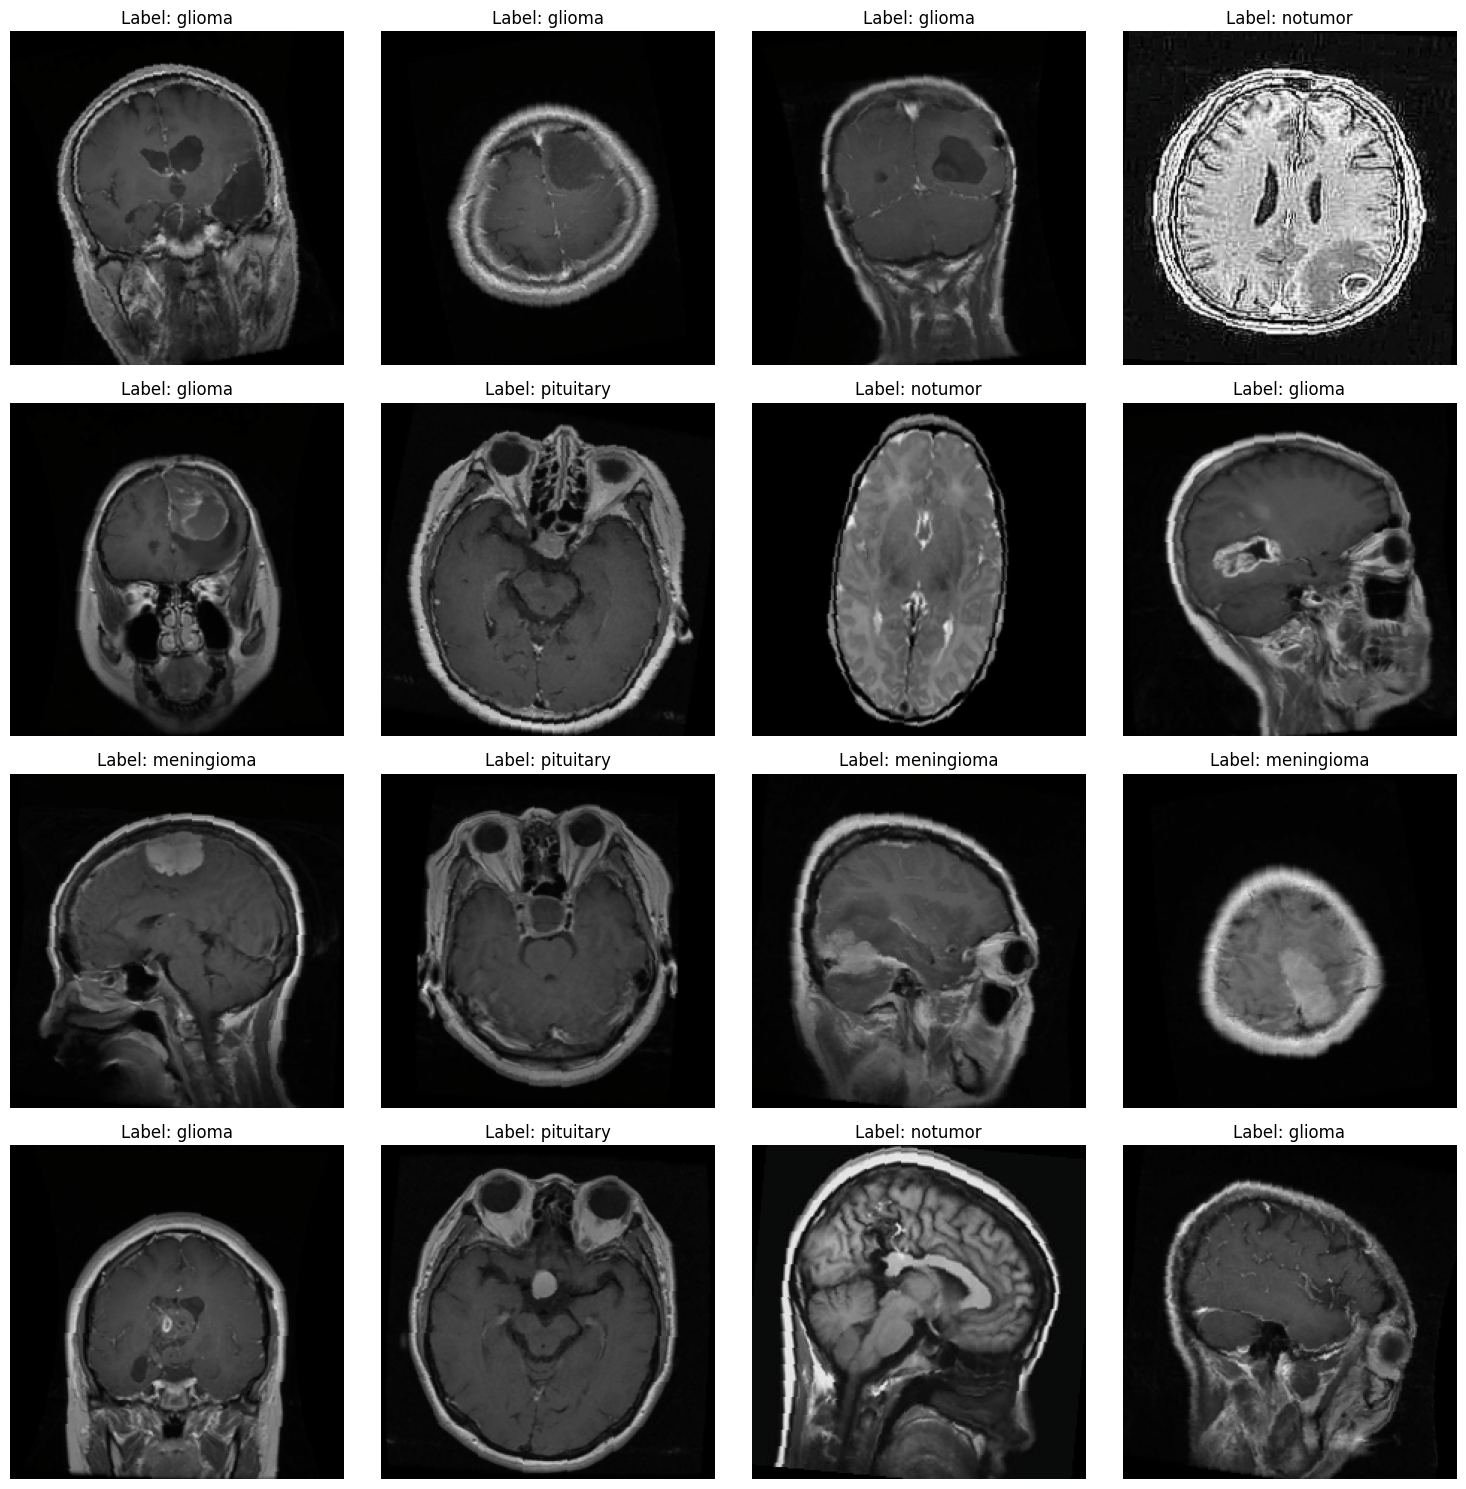

In [5]:
# Cargar un batch para visualizar algunas de las muestras junto con la etiqueta asociada
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Convertir imágenes a arreglos de números y normalizar
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
images = (images.numpy().transpose((0, 2, 3, 1)) * std + mean).clip(0, 1)

# Crear un grid de imágenes
num_images = len(images)
rows = int(np.ceil(num_images / 4))
fig, axes = plt.subplots(rows, 4, figsize=(15, 15))

# Graficar imágenes junto a su 
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(images[i])
        ax.set_title(f'Label: {train_dataset.classes[labels[i]]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# Definición del modelo
class TumorClassifier(nn.Module):
    def __init__(self, num_classes):
        super(TumorClassifier, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(32 * 56 * 56, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

model = TumorClassifier(num_classes=4)

model.to(device)

TumorClassifier(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=100352, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=4, bias=True)
  )
)

In [7]:
# Definir función de pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#### Entrenamiento del modelo

In [8]:
# Inicializar listas para registrar resultados del entrenamiento
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [9]:
# Ciclo de entrenamiento
num_epochs = 20
best_val_accuracy = 0.0

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_accuracy = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    
    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    val_loss /= len(val_loader)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2%}, '
          f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2%}')

    
    # Save the best model
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), 'best_model.pt')

Epoch [1/20], Training Loss: 238.9543, Training Accuracy: 76.87%, Validation Loss: 0.4162, Validation Accuracy: 83.14%
Epoch [2/20], Training Loss: 114.3837, Training Accuracy: 88.01%, Validation Loss: 0.3284, Validation Accuracy: 87.64%
Epoch [3/20], Training Loss: 86.4665, Training Accuracy: 90.98%, Validation Loss: 0.3370, Validation Accuracy: 88.18%
Epoch [4/20], Training Loss: 62.4558, Training Accuracy: 93.52%, Validation Loss: 0.1902, Validation Accuracy: 93.36%
Epoch [5/20], Training Loss: 48.3252, Training Accuracy: 95.31%, Validation Loss: 0.2979, Validation Accuracy: 91.30%
Epoch [6/20], Training Loss: 41.1054, Training Accuracy: 96.03%, Validation Loss: 0.1405, Validation Accuracy: 94.81%
Epoch [7/20], Training Loss: 28.9106, Training Accuracy: 97.06%, Validation Loss: 0.2334, Validation Accuracy: 92.52%
Epoch [8/20], Training Loss: 24.8543, Training Accuracy: 97.69%, Validation Loss: 0.1684, Validation Accuracy: 95.12%
Epoch [9/20], Training Loss: 23.4374, Training Accurac

#### Evaluación del modelo

In [10]:
# Cálculo de la exactitud del modelo
accuracy = correct / total
print(f'Validation Accuracy: {accuracy:.2%}')

Validation Accuracy: 97.10%


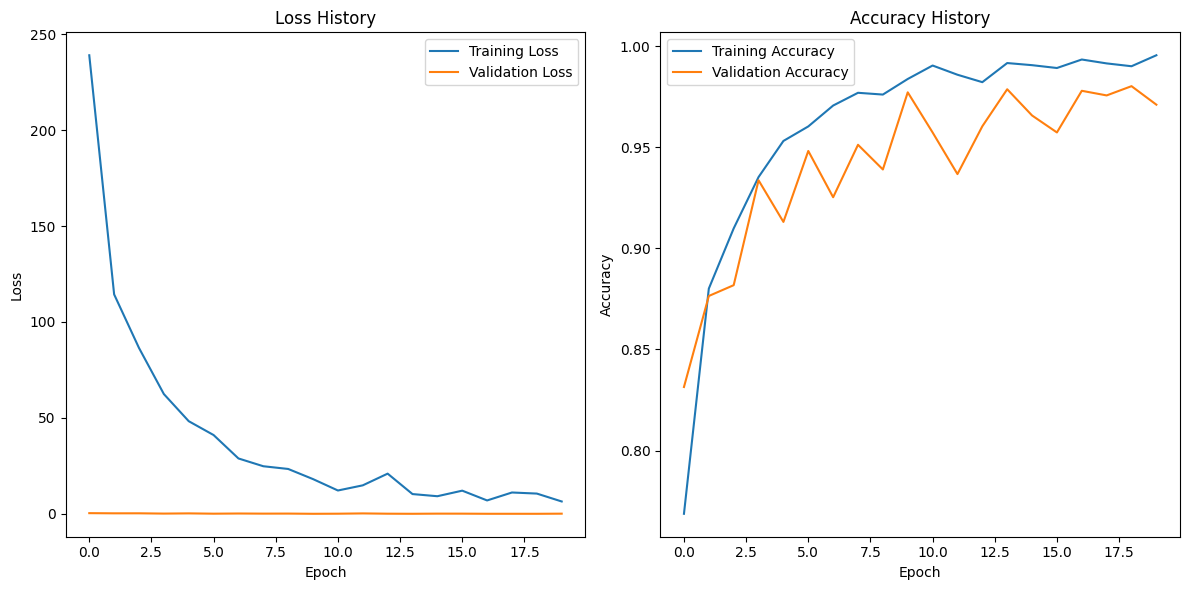

In [11]:
# Visualizar progreso del modelo durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss History')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy History')

plt.tight_layout()
plt.show()

### RNN
**RNN** son las siglas de *Recurrent Neural Network*, que se traduce a Redes Neuronales Recurrentes. Estas emplean la **reincidencia** de los datos para generar predicciones, es decir, se utiliza la información procesada por un estado oculto anterior a manera de retroalimentación para generar predicciones nuevas.

En este caso los *estados ocultos* se encuentran en las *capas ocultas* de la red neuronal y en la literatura son comúnmente denotadas como $h^t$. También se les refiere como a una clase de **memoria**.

A continuación se muestra un diagrama que representa la arquitectura básica de las RNNs.

#### Ilustración de una RNN básica
<img    src="images/RNN_unfolded_output_to_hidden.png"
        width="500"
        height="300">

### Transformadores

Los *transformers* fueron la revolución del área de *procesamiento de lenguaje natural* en tareas de traducción y generación de texto cuando fueron introducidos por Vaswani y sus colaboradores en 2017. Se deshicieron de cualquier operación de convolución o de retroalimentación de la información en las redes neuronales, reemplazándolos por **procesos atencionales**. Estas arquitecturas *que ya prestaban atención* entre los valores de entrada y su relación con los valores de salida, sentaron las bases de las inteligencias artificiales más avanzadas, ejemplo de ello es el conocido ChatGPT.

La siguiente figura ilustra la arquitectura general de los transformadores:

<figure>
<img    src="images/Transformer.png"
        width=500
        height=700>
        <figcaption> Fig. #: Arquitectura básica de los transformadores (Vaswani, et al., 2017). 
</figure>

## Métricas de evaluación de modelos

### Exactitud

Es la exactitud de la predicción del modelo, es una medida que nos informa sobre la correcta clasificación de todas las clasificaciónes. Su valor es en porcentajes de 0% a 100%.

### Sensibilidad

La especificidad es la verdadera tasa negativa de una prueba. En otras palabras, representa la proporción de personas sin la enfermedad, que tendrá un resultado negativo. Al igual que para la sensibilidad, los valores oscilan entre 0 y 100%.

### Especificidad

Es la tasa de positividad verdadera de una prueba. Es decir, cuántos sujetos con una enfermedad son realmente identificados como portadores de la enfermedad por la prueba. Los valores oscilan entre 0 y 100%.

### Precisión

Es una medida que nos dice de todos los casos previstos, cuántos son casos reales. Rango de valores posibles de 0 a 1.

### *Recall*
Es una medida informativa que indica el número de *casos* identificados por el modelo con respecto del número de *casos* real. Por ejemplo, una pregunta que el *recall* responde es: "Del número total de pacientes con cáncer, ¿cuántos fueron correctamente identificados por el modelo?".

### Curva ROC (*Area under the receiver operator curve*)

Es una medida que detalla qué tan sensible y específico es el modelo. Normalmente se detalla en una gráfica en donde el eje *x* representa las predicciones erróneas, y el *y* las positivas. Una métrica mala en términos de sensitividad y especificidad se encontraría por debajo de una valor de 0.5. Análogamente, sería como tirar un volado.

## Aprendizaje supervisado, no supervisado y reforzado

Son las dos principales clases en las que se clasifica el aprendizaje automático.

El **aprendizaje supervisado** consiste en un aprendizaje en donde el modelo aprende a mapear las entradas hacia una salida predefinida (etiquetas) con base en el ajuste continuo de sus parámetros. El **aprendizaje no supervisado** no cuenta con ningún tipo de identificador o etiqueta, sino que se encargan de encontrar estructuras o patrones inherentes a los datos de entrada.

### t-SNE

### PCA

# Comprendiendo el proceso


1.   Recopilación de datos

2.   Preparación de nuestros datos

3.   ¡Hora de elejir el modelo!

4.   Entrenar al modelo

5.   Evaluación: ¿Es suficientemente competente?

6.   Ajuste: Hora de volver a atrás

7.   Modelo listo para predecir













# Referencias
---

1. Auslander, N., Gussow, A. B., & Koonin, E. V. (2021). Incorporating machine learning into established bioinformatics frameworks. International journal of molecular sciences, 22(6), 2903.
2. Mendez, K. M., Reinke, S. N., & Broadhurst, D. I. (2019). A comparative evaluation of the generalised predictive ability of eight machine learning algorithms across ten clinical metabolomics data sets for binary classification. Metabolomics, 15, 1-15.
3. Rauschert, S., Raubenheimer, K., Melton, P. E., & Huang, R. C. (2020). Machine learning and clinical epigenetics: a review of challenges for diagnosis and classification. Clinical , 12, 1-11.
4. Angermueller, C., Pärnamaa, T., Parts, L., & Stegle, O. (2016). Deep learning for computational biology. Molecular systems biology, 12(7), 878.
